<a href="https://colab.research.google.com/github/Tsaraban/CM4145_NLP_coursework/blob/main/CE4145_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CM4145 Natural Language Processing Coursework**
#### The aim of this coursework compare two NLP pipelines and determine the most suitable stratedy for given task on the dataset.


##**Section 1:**

**Dataset :**

This project uses the emotiona_dataset_raw.csv from https://www.kaggle.com/datasets/mayurjare/emotion-datasets,
containing 8 Emotion Classes: 'joy', 'sadness', 'fear', 'anger', 'surprise', 'neutral', 'disgust', 'shame'. The task is to classify text samples into their corresponding emotion categories to enable human emotion recognition through text.

Detecting emotions in text is important for improving customer service, analysing social media posts, and finding peoples reaction to a certain content. Since manually labelling emotions is slow, subjective, and hard to scale, NLP methods are key to handling the huge amount of user-generated content online
The dataset presents several challenges that make it particularly interesting for NLP analysis.

The texts reflect everyday, informal language often seen on platforms like Twitter, messaging apps, and online forums, which makes emotion detection challenging, as emotions can be subtle, context-dependent, or expressed through sarcasm. The dataset may also show class imbalance, where some emotions appear more frequently than others, I will be taking some suggested steps for this issue.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the csv file I have saved in my drive.
#Please change the directory accordingly.
raw_df = pd.read_csv('/content/drive/MyDrive/4th year Coursework/CE4145_Coursework/emotion_dataset_raw.csv')

In [4]:
#dropna() function remove missing values from a DataFrame
df=(raw_df.dropna())

print(list(df.columns)) #Column names

print(df.shape) #shape

['Emotion', 'Text']
(34792, 2)


Checking if there are any duplicate rows

In [5]:
duplicate_mask = df.duplicated(keep=False)
duplicate_count = duplicate_mask.sum()
duplicate_rows = df[duplicate_mask]

print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 6224



*Remove duplicate rows from 'df', keeping only the first occurrence.*
There are 6224 duplicate rows,
I will use the `drop_duplicates()` method on the `df` DataFrame to remove duplicate rows, keeping the first occurrence of each duplicate. This operation modifies the DataFrame `df` in place, ensuring that only unique rows remain.

In [6]:
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after removing duplicates: {df.shape}")

DataFrame shape after removing duplicates: (31162, 2)


Exploring the dataset's each emotion to understand the class distribution and whether this dataset is imbalance or not.

In [7]:
#Getting percentage of each 8 emotions to get an idea about the balance of the dataset

print('anger:', round(raw_df['Emotion'].value_counts()['anger']/len(raw_df) * 100,2), '% of the dataset')
print('disgust:', round(raw_df['Emotion'].value_counts()['disgust']/len(raw_df) * 100,2), '% of the dataset')
print('fear:', round(raw_df['Emotion'].value_counts()['fear']/len(raw_df) * 100,2), '% of the dataset')
print('joy:', round(raw_df['Emotion'].value_counts()['joy']/len(raw_df) * 100,2), '% of the dataset')
print('neutral:', round(raw_df['Emotion'].value_counts()['neutral']/len(raw_df) * 100,2), '% of the dataset')
print('sadness:', round(raw_df['Emotion'].value_counts()['sadness']/len(raw_df) * 100,2), '% of the dataset')
print('shame:', round(raw_df['Emotion'].value_counts()['shame']/len(raw_df) * 100,2), '% of the dataset')
print('surprise:', round(raw_df['Emotion'].value_counts()['surprise']/len(raw_df) * 100,2), '% of the dataset')

#Getting count of each emotions
balance_counts = df.groupby('Emotion')['Emotion'].count()
balance_counts

anger: 12.35 % of the dataset
disgust: 2.46 % of the dataset
fear: 15.55 % of the dataset
joy: 31.75 % of the dataset
neutral: 6.48 % of the dataset
sadness: 19.32 % of the dataset
shame: 0.42 % of the dataset
surprise: 11.68 % of the dataset


,Emotion
Emotion,
anger,3777
disgust,855
fear,4266
joy,10464
neutral,1466
sadness,6175
shame,144
surprise,4015


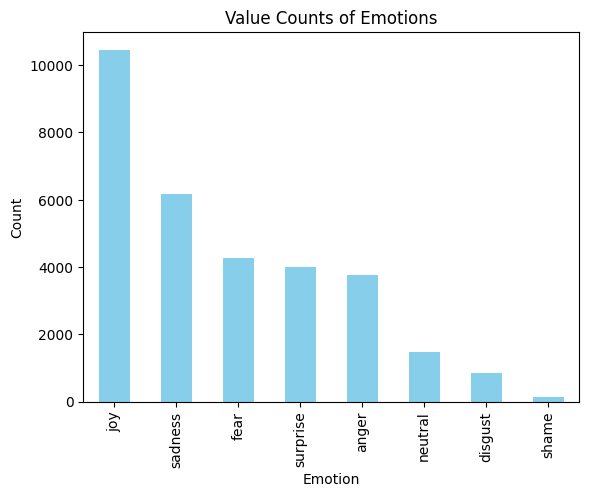

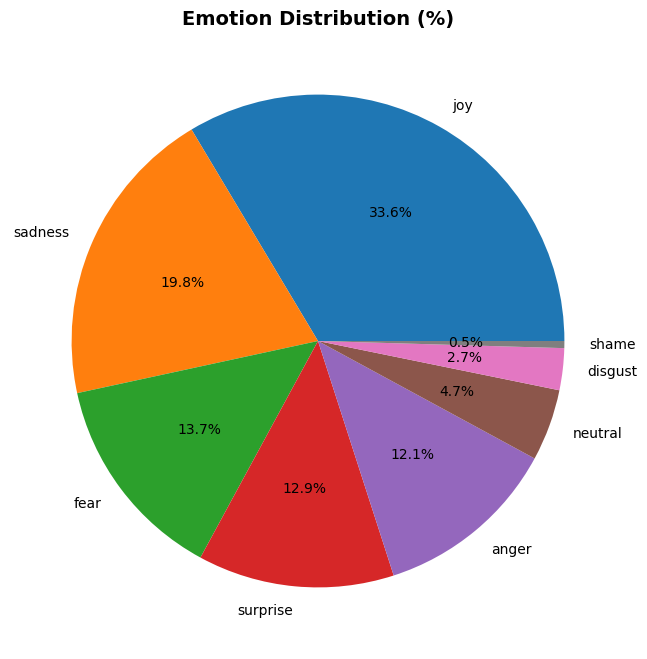

In [8]:
# Calculate value counts
counts = df['Emotion'].value_counts()

# Plot value counts
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Value Counts of Emotions')
plt.show()

plt.figure(figsize=(8, 8))
df['Emotion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Emotion Distribution (%)', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

Clearly the dataset is Imbalance, While implementing the algorithm I will be adding weight to it.

In [9]:
# Text length analysis
df['text_length'] = df['Text'].str.len()
df['word_count'] = df['Text'].str.split().str.len()

print("\n" + "="*60)
print("TEXT LENGTH STATISTICS")
print("="*60)
print(df[['text_length', 'word_count']].describe())



TEXT LENGTH STATISTICS
        text_length    word_count
count  31162.000000  31162.000000
mean      87.577081     16.377639
std       46.570273      9.057362
min        4.000000      1.000000
25%       55.000000     10.000000
50%       83.000000     15.000000
75%      116.000000     21.000000
max     1160.000000    261.000000


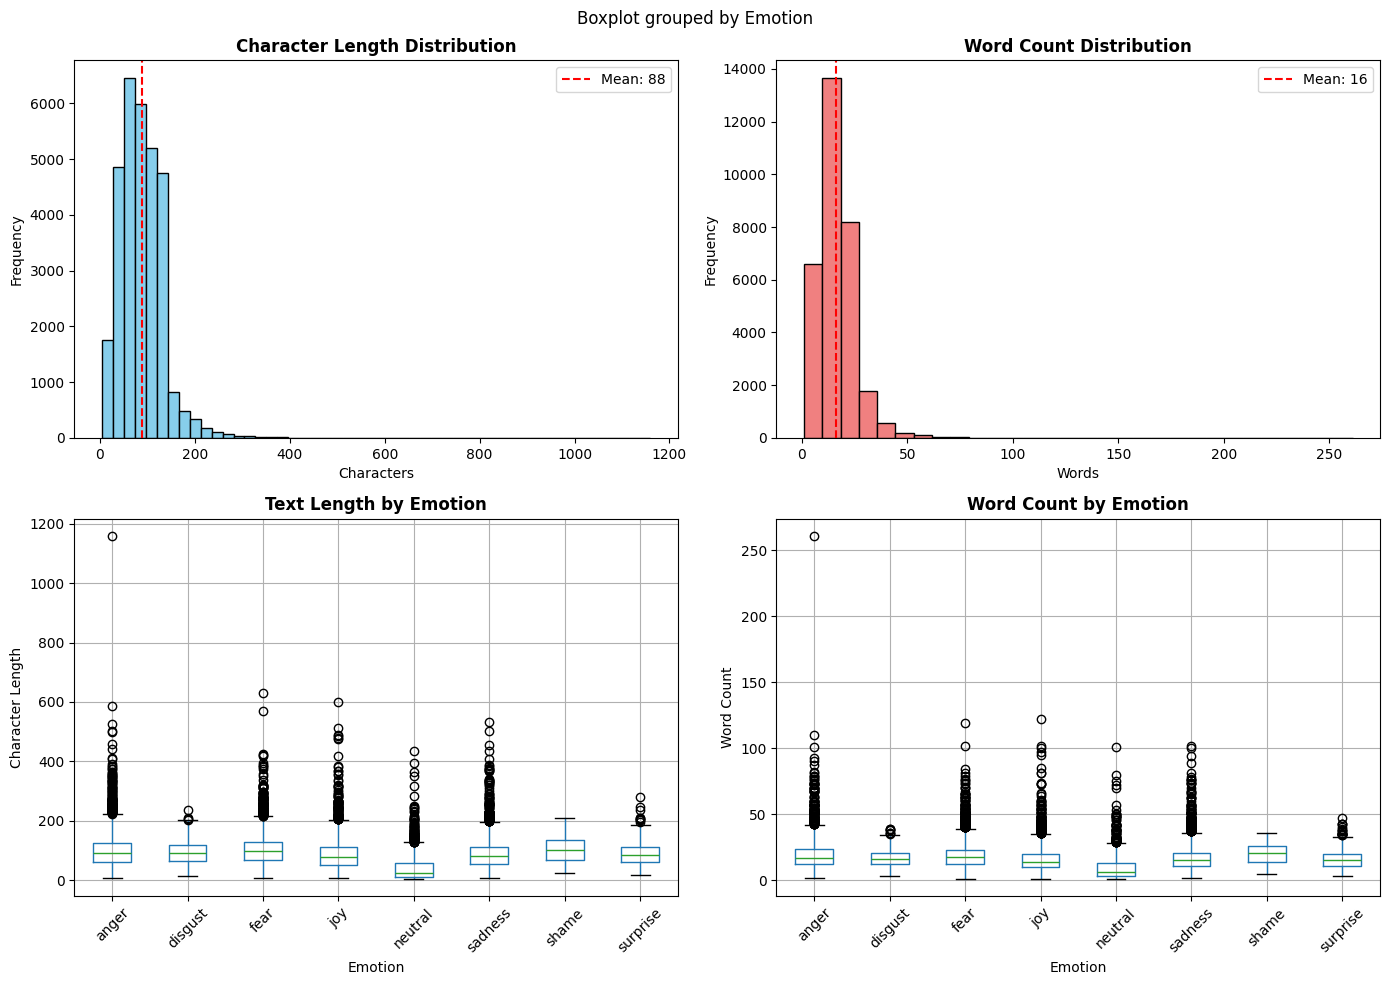

In [10]:
# Visualize text lengths
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Character length distribution
axes[0, 0].hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Character Length Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Characters')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["text_length"].mean():.0f}')
axes[0, 0].legend()

# Word count distribution
axes[0, 1].hist(df['word_count'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Word Count Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["word_count"].mean():.0f}')
axes[0, 1].legend()

# Box plot by emotion
df.boxplot(column='text_length', by='Emotion', ax=axes[1, 0])
axes[1, 0].set_title('Text Length by Emotion', fontweight='bold')
axes[1, 0].set_xlabel('Emotion')
axes[1, 0].set_ylabel('Character Length')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# Box plot word count
df.boxplot(column='word_count', by='Emotion', ax=axes[1, 1])
axes[1, 1].set_title('Word Count by Emotion', fontweight='bold')
axes[1, 1].set_xlabel('Emotion')
axes[1, 1].set_ylabel('Word Count')
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [11]:
# Sample texts per emotion
print("\n" + "="*60)
print("SAMPLE TEXTS PER EMOTION")
print("="*60)
for emotion in df['Emotion'].unique():
    print(f"\n{emotion.upper()}:")
    samples = df[df['Emotion'] == emotion]['Text'].sample(min(3, len(df[df['Emotion'] == emotion])))
    for i, text in enumerate(samples, 1):
        print(f"  {i}. {text}")


SAMPLE TEXTS PER EMOTION

NEUTRAL:
  1.  Bob . 
  2.  Have a try . 
  3.  Yes , I have nothing to do . 

JOY:
  1. You're so kind and you're one of my favorites. Thanks for your friendship. ✖❁✖❁☀~☀♥☀*•.♡*.¸¸.*  # Light &amp; to you.☀♥☀ @zbleumoon
  2. Whereas in Crime and Punishment and in the novels which follow he can , though his narrow glee over being ahead of the fact is unworthy of his art and of what ` idealism " and ` deeper realism " intend . 
  3. I can't help but feel all warm and fuzzy inside when my boss greatly compliments me for my work. #happy #proud #like #a #boss

SADNESS:
  1. Singing &quot;Someone like you&quot; in a car, in the rain, with @rockchalkkansas @meganconnell1. What is this, an ABC family movie? #Lol ...
  2. So I have to say bye to 2 people I really care about all in one day:(& 
  3. @Zonozi Just checked it out - @oinkapp only for iPhone. So, guess my Droid-loving self can't use. 

FEAR:
  1. @NeffyBlack for real;) a person snaking you will never be abo

For text pre-processing I will be,
* Lowercase letters.
* Removing URLs.
* remove mentions and hashtags
* Removing punctuation.
* Spelling Correction.
* Removing stop words
* Handling Emojies
* Tokenization
* Lemmatization

The reason I have chosen Lemmatization over Stemmaing cause, Stemming is simpler and faster but less accurate, often producing non-words by cutting off prefixes or suffixes.
Meanwhile Lemmatization is more complex and accurate, considers context, converting words to their base forms using a dictionary.


In [12]:
import re
import string
from textblob import TextBlob # Import this Library to Handle the Spelling Issue.

import nltk #import the natural language toolkit

nltk.download('punkt') #download the package in nltk which supports tokenization
nltk.download('stopwords') #download the nltk package for stopwords
nltk.download('punkt_tab') # Download punkt_tab resource for NLTK tokenization
nltk.download('wordnet') # Download wordnet for lemmatization

from nltk.tokenize import word_tokenize #import the tokenize package
from nltk.corpus import stopwords #import the package from the corpus
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Here are some chatwords and emojis which I have collected from github, links are on top of each cell. With help of these I handled emojis and chat words.

In [13]:
#@title Code for Chatwords
# Repository Link : https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [14]:
# Function
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

In [15]:
#@title Code for Emoticons
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\)'
<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:12: SyntaxWarning: invalid escape sequence '\)'
<>:13: SyntaxWarning: invalid escape sequence '\)'
<>:14: SyntaxWarning: invalid escape sequence '\}'
<>:15: SyntaxWarning: invalid escape sequence '\}'
<>:16: SyntaxWarning: invalid escape sequence '\)'
<>:17: SyntaxWarning: invalid escape sequence '\)'
<>:18: SyntaxWarning: invalid escape sequence '\^'
<>:19: SyntaxWarning: invalid escape sequence '\]'
<>:20: SyntaxWarning: invalid escape sequence '\)'
<>:29: SyntaxWarning: invalid escape sequence '\^'
<>:30: SyntaxWarning: invalid escape sequence '\)'
<>:31: SyntaxWarning: invalid escape sequence '\('
<>:32: SyntaxWarning: invalid escape sequence '\('
<>:33: SyntaxWarning: invalid escape sequence '\('
<>:38: SyntaxWarning: invalid escape sequence '\['
<>:39: SyntaxWarning: invalid escap

In [17]:
#function to remove emoji

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [ ]:
#function to convert emoji

There are so many opinions about emojis. It can be removed or used. In my case to detect emotions I feel emojis can play a great part. I will try both with and without emojis and see if it makes any different.

For pre_process I will be removing the emojis and pre_process2 I will converting emojis.

In [18]:
def pre_process(text):

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|#', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    #text = str(TextBlob(text=text).correct())
    #text = TextBlob(text).correct()
    text = chat_conversion(text)
    text = remove_emoticons(text)
    #stopwords
    words = text.split()
    filtered = [w for w in words if w not in stop_words]
    text = " ".join(filtered)
    #Tokenization
    tokens = word_tokenize(text)
    #print("TOKENS:", tokens) #For testing
    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in tokens]
    text = " ".join(text)

    return text

I have tried texblob for spelling but it takes infinity time, that is why I have commented it out.

In [19]:
df['pre_process'] = df['Text'].astype(str).apply(pre_process)
clean_df = df[df['pre_process'].str.strip() != ''] # getting rid of any empty Text rows.


Generating word clouds...


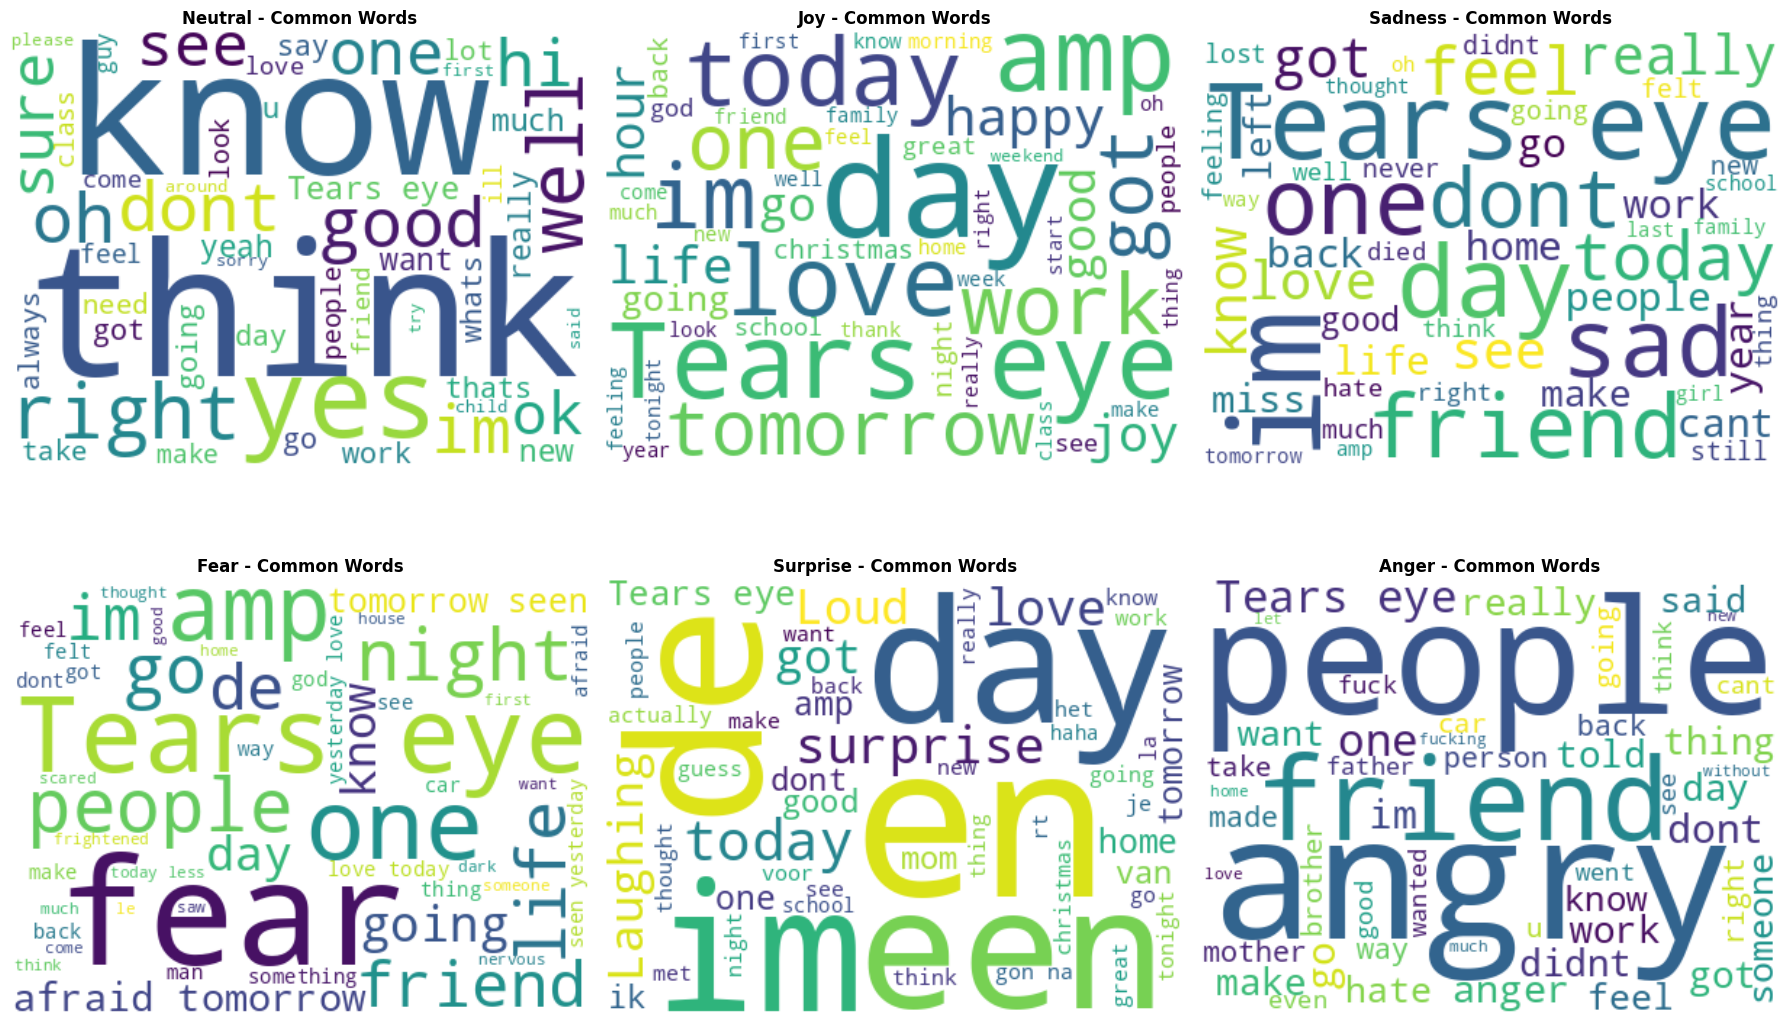

In [20]:
from wordcloud import WordCloud
from collections import Counter

# Word clouds per emotion
print("\nGenerating word clouds...")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, emotion in enumerate(df['Emotion'].unique()[:6]):
    emotion_text = ' '.join(df[df['Emotion'] == emotion]['pre_process'])
    wordcloud = WordCloud(
        width=400, height=300,
        background_color='white',
        colormap='viridis',
        max_words=50
    ).generate(emotion_text)

    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'{emotion.capitalize()} - Common Words', fontsize=12, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

##**Section 2:**

**Representation Learning :**




In [21]:
import io
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['pre_process'],
    df['Emotion'],
    test_size=0.2,
    random_state=42,
    stratify=df['Emotion']  #To Maintains class balance
)

In [23]:
print("TRAIN-TEST SPLIT")
print(f"Training samples: {len(X_train)} (80%)")
print(f"Testing samples: {len(X_test)} (20%)")

print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True) * 100)

TRAIN-TEST SPLIT
Training samples: 24929 (80%)
Testing samples: 6233 (20%)

Class distribution in training set:
Emotion
joy         33.579365
sadness     19.816278
fear        13.690882
surprise    12.884592
anger       12.118416
neutral      4.705363
disgust      2.743792
shame        0.461310
Name: proportion, dtype: float64

Class distribution in test set:
Emotion
joy         33.579336
sadness     19.813894
fear        13.685224
surprise    12.883042
anger       12.128991
neutral      4.700786
disgust      2.743462
shame        0.465266
Name: proportion, dtype: float64


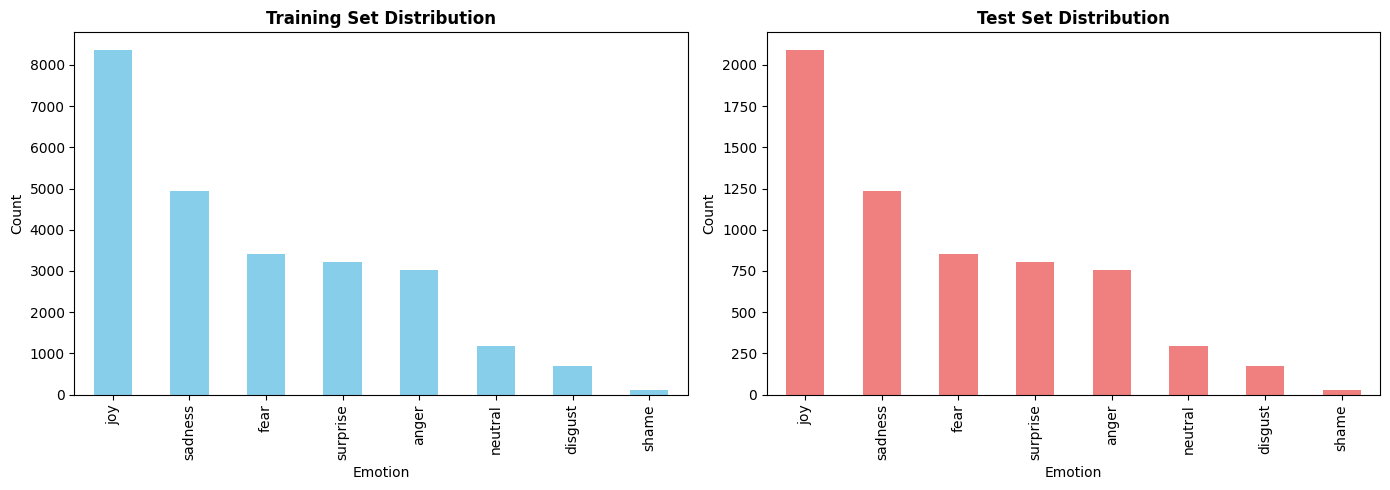

In [24]:
# Visualize split
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

pd.Series(y_train).value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Training Set Distribution', fontweight='bold')
axes[0].set_xlabel('Emotion')
axes[0].set_ylabel('Count')

pd.Series(y_test).value_counts().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Test Set Distribution', fontweight='bold')
axes[1].set_xlabel('Emotion')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [25]:
# Initialize with optimal parameters
vectorizer = TfidfVectorizer(max_features=20000,
    ngram_range=(1,2),
    min_df=3,)

# Fit on training data ONLY
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

TF-IDF matrix shape (train): (24929, 13667)
TF-IDF matrix shape (test): (6233, 13667)

Top 30 Features by Total TF-IDF Score:
  im                  : 286.72
  day                 : 265.28
  eye                 : 244.96
  tears eye           : 222.28
  tears               : 222.28
  like                : 212.94
  get                 : 211.23
  love                : 205.78
  one                 : 200.40
  dont                : 197.36


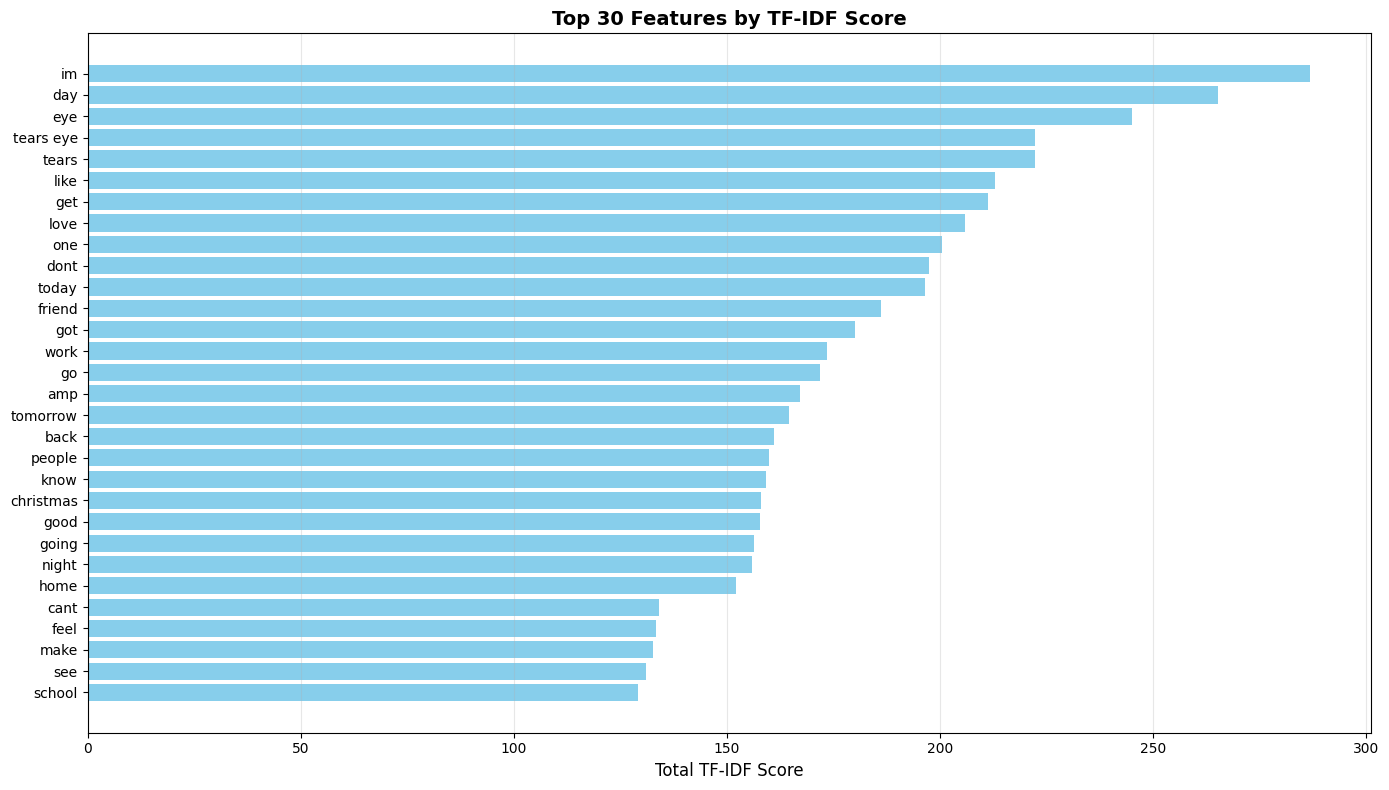

In [26]:
print(f"TF-IDF matrix shape (train): {X_train_vec.shape}")
print(f"TF-IDF matrix shape (test): {X_test_vec.shape}")

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Analyze top features by TF-IDF score
tfidf_scores = np.asarray(X_train_vec.sum(axis=0)).flatten()
top_indices = tfidf_scores.argsort()[-30:][::-1]
top_features = [feature_names[i] for i in top_indices]
top_scores = [tfidf_scores[i] for i in top_indices]

print("\nTop 30 Features by Total TF-IDF Score:")
for feat, score in zip(top_features[:10], top_scores[:10]):
    print(f"  {feat:20s}: {score:.2f}")

# Visualize top features
plt.figure(figsize=(14, 8))
plt.barh(range(len(top_features)), top_scores, color='skyblue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Total TF-IDF Score', fontsize=12)
plt.title('Top 30 Features by TF-IDF Score', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

* https://www.kaggle.com/code/alfathterry/tf-idf-nlp
* https://www.kaggle.com/code/sugataghosh/e-commerce-text-classification-tf-idf-word2vec#TF-IDF-Model
* https://www.kaggle.com/code/parulpandey/getting-started-with-nlp-feature-vectors#2.TF-IDF-Vectorizer
* https://medium.com/tech-talk-with-chatgpt/text-classification-for-beginners-a-guide-to-text-representation-and-classification-methods-7e3251f1a75b

Using GridSearchCV to find the best parameters for SVM

##**Section 3: Algorithms:**
Describe the theory behind the
algorithms to be applied.
Implement 2 NLP algorithms. Consider
reviewing Weeks 4 – 8 for ideas.

### **MLP**

In [27]:
from keras.preprocessing import sequence
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.regularizers import l2

Total samples: 31162
Emotion distribution:
Emotion
joy         10464
sadness      6175
fear         4266
surprise     4015
anger        3777
neutral      1466
disgust       855
shame         144
Name: count, dtype: int64

Number of classes: 8

Train samples: 24929
Test samples: 6233

Feature matrix shape: (24929, 5000)
Vocabulary size: 5000

Class weights: {0: np.float64(1.0314879179079774), 1: np.float64(4.555738304093567), 2: np.float64(0.9130164078523293), 3: np.float64(0.37225241906582246), 4: np.float64(2.65654305200341), 5: np.float64(0.6307945344129555), 6: np.float64(27.096739130434784), 7: np.float64(0.9701509962640099)}

MODEL ARCHITECTURE


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,904 (2.48 MB)

 Trainable params: 648,904 (2.48 MB)

 Non-trainable params: 0 (0.00 B)


TRAINING
Epoch 1/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.1004 - loss: 2.5219 - val_accuracy: 0.0455 - val_loss: 2.0884 - learning_rate: 0.0010
Epoch 2/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0510 - loss: 2.0892 - val_accuracy: 0.0451 - val_loss: 2.0820 - learning_rate: 0.0010
Epoch 3/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.0998 - loss: 2.0979 - val_accuracy: 0.3289 - val_loss: 2.0936 - learning_rate: 0.0010
Epoch 4/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2100 - loss: 2.0571 - val_accuracy: 0.3299 - val_loss: 2.0987 - learning_rate: 0.0010
Epoch 5/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.1987 - loss: 1.9989 - val_accuracy: 0.3183 - val_loss: 2.1127 - learning_rate: 0.0010
Epoch 6/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.1727 - loss: 1.9867 - val_accuracy: 0.1099 - val_loss: 2.1419 - learning_rate: 0.0010
Epoch 7/100
623/624 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy:

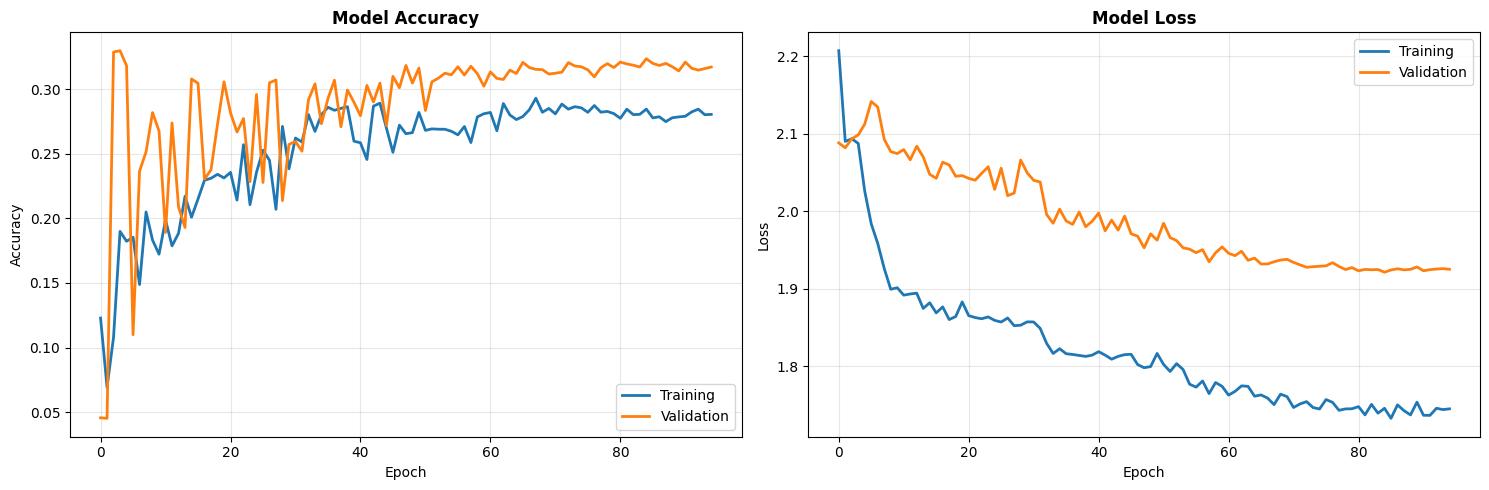


EVALUATION
Training Loss:     1.8920
Training Accuracy: 0.3483

Test Loss:     1.9162
Test Accuracy: 0.3258

Overfitting Gap: 0.0225 (2.25%)
✅ Excellent generalization!

CLASSIFICATION REPORT
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       756
     disgust       0.00      0.00      0.00       171
        fear       0.18      0.14      0.16       853
         joy       0.46      0.76      0.57      2093
     neutral       0.11      0.63      0.19       293
     sadness       0.27      0.08      0.12      1235
       shame       0.88      0.97      0.92        29
    surprise       0.40      0.00      0.00       803

    accuracy                           0.33      6233
   macro avg       0.29      0.32      0.25      6233
weighted avg       0.29      0.33      0.25      6233



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


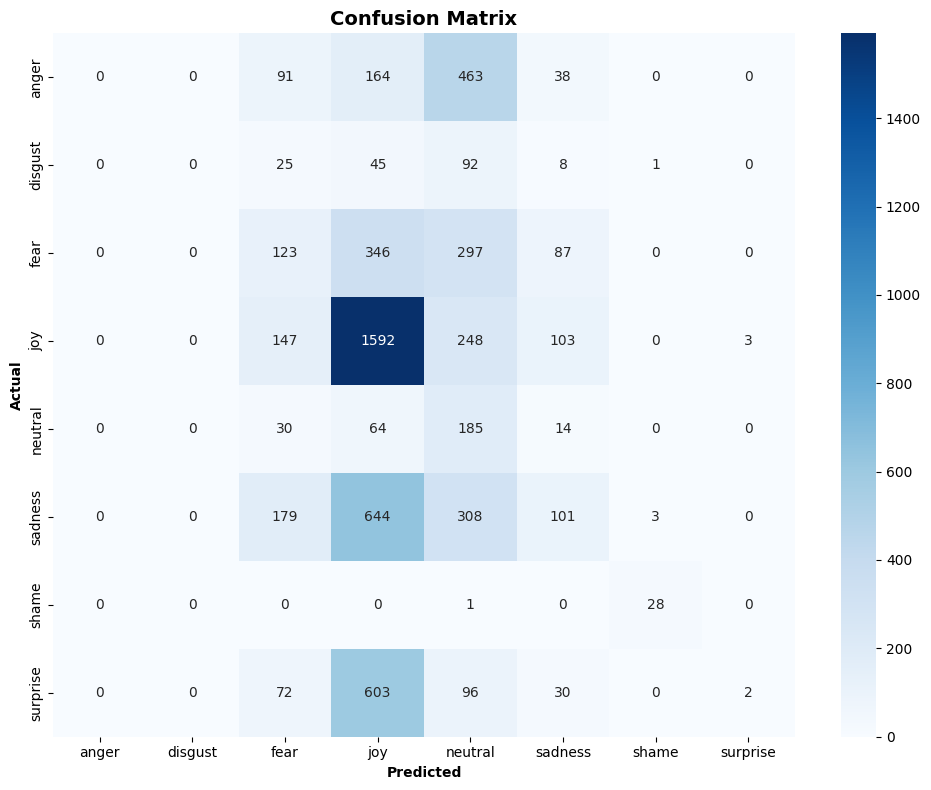


✅ Training Complete!


In [28]:
# -------------------------
# 1. IMPORTS
# -------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight

# -------------------------
# 2. LOAD YOUR DATA
# -------------------------
texts = df['pre_process'].astype(str)
labels = df['Emotion'].astype(str)

print(f"Total samples: {len(texts)}")
print(f"Emotion distribution:\n{labels.value_counts()}")

# -------------------------
# 3. LABEL ENCODE
# -------------------------
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y)

num_classes = y_cat.shape[1]
print(f"\nNumber of classes: {num_classes}")

# -------------------------
# 4. TRAIN / TEST SPLIT (STRATIFIED)
# -------------------------
X_train_text, X_test_text, y_train, y_test, y_train_cat, y_test_cat = train_test_split(
    texts, y, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=y  # ✅ Maintains class balance
)

print(f"\nTrain samples: {len(X_train_text)}")
print(f"Test samples: {len(X_test_text)}")

# -------------------------
# 5. TF-IDF VECTORIZE (FIXED!)
# -------------------------
tfidf = TfidfVectorizer(
    max_features=5000,        # ✅ REDUCED from 20000
    ngram_range=(1, 2),
    min_df=2,                 # ✅ REDUCED from 3
    max_df=0.95,              # ✅ ADDED
    sublinear_tf=True,        # ✅ ADDED
    # stop_words='english'    # ✅ REMOVED! (keeps "not", "very")
)

X_train = tfidf.fit_transform(X_train_text).astype("float32").toarray()
X_test = tfidf.transform(X_test_text).astype("float32").toarray()

print(f"\nFeature matrix shape: {X_train.shape}")
print(f"Vocabulary size: {len(tfidf.vocabulary_)}")

# -------------------------
# 6. COMPUTE CLASS WEIGHTS (Handle Imbalance)
# -------------------------
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print(f"\nClass weights: {class_weight_dict}")

# -------------------------
# 7. BUILD SIMPLER MODEL (REDUCED COMPLEXITY!)
# -------------------------
model = Sequential([
    # Layer 1
    Dense(128, activation='relu',
          kernel_regularizer=l2(0.01),      # ✅ ADDED L2 regularization
          input_shape=(X_train.shape[1],)),
    Dropout(0.5),

    # Layer 2
    Dense(64, activation='relu',
          kernel_regularizer=l2(0.01)),     # ✅ ADDED L2 regularization
    Dropout(0.4),

    # Output layer
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("\n" + "="*60)
print("MODEL ARCHITECTURE")
print("="*60)
model.summary()

# -------------------------
# 8. CALLBACKS (IMPROVED!)
# -------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,                    # ✅ INCREASED from 3
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# -------------------------
# 9. TRAIN MODEL (IMPROVED!)
# -------------------------
print("\n" + "="*60)
print("TRAINING")
print("="*60)

history = model.fit(
    X_train, y_train_cat,
    epochs=100,                     # ✅ INCREASED from 15
    batch_size=32,                  # ✅ REDUCED from 256
    validation_split=0.2,
    class_weight=class_weight_dict, # ✅ ADDED class weights
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# -------------------------
# 10. TRAINING HISTORY VISUALIZATION
# -------------------------
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Training', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# -------------------------
# 11. EVALUATE
# -------------------------
print("\n" + "="*60)
print("EVALUATION")
print("="*60)

# Training evaluation
train_results = model.evaluate(X_train, y_train_cat, verbose=0)
print(f"Training Loss:     {train_results[0]:.4f}")
print(f"Training Accuracy: {train_results[1]:.4f}")

# Test evaluation
test_results = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Loss:     {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Overfitting analysis
overfitting_gap = train_results[1] - test_results[1]
print(f"\nOverfitting Gap: {overfitting_gap:.4f} ({overfitting_gap*100:.2f}%)")

if overfitting_gap < 0.05:
    print("✅ Excellent generalization!")
elif overfitting_gap < 0.10:
    print("✅ Good generalization")
elif overfitting_gap < 0.15:
    print("⚠️ Moderate overfitting")
else:
    print("🚨 High overfitting - consider further regularization")

# -------------------------
# 12. DETAILED METRICS
# -------------------------
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\n✅ Training Complete!")

In [42]:
# -------------------------
# 1. IMPORTS
# -------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# -------------------------
# 2. LOAD YOUR DATA
# -------------------------
texts = df['pre_process'].astype(str)
labels = df['Emotion'].astype(str)

# -------------------------
# 3. LABEL ENCODE
# -------------------------
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y)        # one-hot for categorical_crossentropy

# -------------------------
# 4. TRAIN / TEST SPLIT (STRATIFIED)
# -------------------------
X_train_text, X_test_text, y_train_cat, y_test_cat = train_test_split(
    texts, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=y  # ✔ ensures class balance in both sets
)

# -------------------------
# 5. TF-IDF VECTORIZE
# -------------------------
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=3,
    stop_words='english'
)

X_train = tfidf.fit_transform(X_train_text).astype("float32").toarray()
X_test  = tfidf.transform(X_test_text).astype("float32").toarray()

# -------------------------
# 6. KERAS MODEL (MLP)
# -------------------------
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# -------------------------
# 7. EARLY STOPPING
# -------------------------
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# -------------------------
# 8. TRAIN MODEL
# -------------------------
history = model.fit(
    X_train, y_train_cat,
    epochs=100,
    batch_size=256,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

# -------------------------
# 9. EVALUATE
# -------------------------
test_results = model.evaluate(X_test, y_test_cat, verbose=1)
print (test_results)
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.2129 - loss: 4.4016 - val_accuracy: 0.3333 - val_loss: 3.2244
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5580 - loss: 2.6570 - val_accuracy: 0.3450 - val_loss: 2.9773
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.6670 - loss: 2.2035 - val_accuracy: 0.3628 - val_loss: 2.7527
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7217 - loss: 1.8898 - val_accuracy: 0.3736 - val_loss: 2.6100
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.7603 - loss: 1.6931 - val_accuracy: 0.4122 - val_loss: 2.4557
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.7839 - loss: 1.5712 - val_accuracy: 0.4587 - val_loss: 2.3635
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.7901 - loss: 1.5067 - val_accuracy: 0.5022 - val_loss: 2.2599
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8046 - loss: 1.4418 - val_accuracy: 0

In [43]:
train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']

print(f"\nFinal Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Overfitting gap:   {(train_acc[-1] - val_acc[-1]):.4f}")



Final Training Accuracy: 0.8245
Final Validation Accuracy: 0.5411
Overfitting gap:   0.2834


### **SVM**

In [31]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score

* https://www.kaggle.com/code/fareselmenshawii/svm-from-scratch#Model-Implementation


In [32]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',
          class_weight='balanced',
          C=0.1, random_state=42)


svm.fit(X_train_vec, y_train)


SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=42)

In [33]:
# Predictions
svm_train_pred = svm.predict(X_train_vec)
svm_test_pred = svm.predict(X_test_vec)

svm_train_acc = accuracy_score(svm_train_pred, y_train)
svm_test_acc = accuracy_score(svm_test_pred, y_test)

print(f"\nTraining accuracy: {svm_train_acc:.4f}")
print(f"Testing accuracy:  {svm_test_acc:.4f}")
print(f"Overfitting gap:   {(svm_train_acc - svm_test_acc):.4f}")


Training accuracy: 0.5788
Testing accuracy:  0.5200
Overfitting gap:   0.0588


In [34]:
mlp = MLPClassifier()  # passing object
mlp.fit(X_train_vec,y_train)

#prediction
pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


ValueError: X has 12019 features, but MLPClassifier is expecting 13667 features as input.

In [ ]:
#https://www.kaggle.com/code/chiranjeevbit/movie-review-prediction#fit-the-model

early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]


In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    #early_stopping=True,
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42,
    verbose=True
)
mlp.fit(X_train_vec, y_train)

In [ ]:
# Predictions
mlp_train_pred = mlp.predict(X_train_vec)
mlp_test_pred = mlp.predict(X_test_vec)

mlp_train_acc = accuracy_score(mlp_train_pred, y_train)
mlp_test_acc = accuracy_score(mlp_test_pred, y_test)

print(f"\nTraining accuracy: {mlp_train_acc:.4f}")
print(f"Testing accuracy:  {mlp_test_acc:.4f}")
print(f"Overfitting gap:   {(mlp_train_acc - mlp_test_acc):.4f}")

In [ ]:
model=Sequential()
#model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['accuracy'])
model.summary()

In [ ]:
mlp_train_pred = mlp_model.predict(X_train_vec)
mlp_test_pred = mlp_model.predict(X_test_vec)

mlp_train_acc = accuracy_score(y_train, mlp_train_pred)
mlp_test_acc = accuracy_score(y_test, mlp_test_pred)

print(f"\nTraining accuracy: {mlp_train_acc:.4f}")
print(f"Testing accuracy:  {mlp_test_acc:.4f}")
print(f"Overfitting gap:   {(mlp_train_acc - mlp_test_acc):.4f}")

In [ ]:
model = mlp(1000, 4) #similarly we have more classes for our mlp so call a new param here
  y_train = to_categorical(y_train, 4) #and have to update our one-hot conversion too
  y_test = to_categorical(y_test, 4)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #the loss should be updated from a binary loss to a categorical loss
  model.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

  test_results = model.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

  acc_score.append(test_results[1])

print("Accuracy:", np.mean(acc_score))

In [ ]:
#lab06

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

def mlp(dataset_size, num_classes):
  input_shape = (dataset_size,)

  model = Sequential()
  model.add(Dense(64, input_shape=input_shape, activation='relu'))
  model.add(Dense(128, activation='relu'))

  model.add(Dense(num_classes, activation='softmax'))
  return model

In [ ]:
 model = mlp(1000, 2) #we also instantiate a new mlp to prevent leakage of train and test set
  y_train = to_categorical(y_train, 2) #convert y to one hot vectors
  y_test = to_categorical(y_test, 2)

  # Configure the model and start training
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #we have parameterised with fairly standard metrics - do feel free to alter and investigate
  model.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

  # Test the model after training
  test_results = model.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

  acc_score.append(test_results[1])

print("Accuracy:", np.mean(acc_score))

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Re-generate SVM classification report as a dictionary
svm_report_dict = classification_report(y_test, svm_pred, target_names=target_names, output_dict=True)

# Re-generate MLP classification report as a dictionary
mlp_report_dict = classification_report(y_test_encoded, mlp_pred, target_names=target_names, output_dict=True)

# Initialize dictionary to store comparison data
comparison_data = {
    'Metric': [],
    'SVM': [],
    'MLP': []
}

# Extract F1-scores for each emotion class
for emotion in target_names:
    comparison_data['Metric'].append(f'{emotion} F1-score')
    comparison_data['SVM'].append(svm_report_dict[emotion]['f1-score'])
    comparison_data['MLP'].append(mlp_report_dict[emotion]['f1-score'])

# Extract overall accuracy
comparison_data['Metric'].append('Overall Accuracy')
comparison_data['SVM'].append(svm_report_dict['accuracy'])
comparison_data['MLP'].append(mlp_report_dict['accuracy'])

# Convert to pandas DataFrame
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f1_scores_df = comparison_df[~comparison_df['Metric'].str.contains('Overall Accuracy')]

f1_scores_melted = pd.melt(f1_scores_df, id_vars=['Metric'], value_vars=['SVM', 'MLP'],
                          var_name='Model', value_name='F1-score')

plt.figure(figsize=(14, 8)) # Increased figure size for better readability
sns.barplot(x='Metric', y='F1-score', hue='Model', data=f1_scores_melted, palette='viridis') # Changed palette
plt.title('F1-score Comparison of SVM vs. MLP per Emotion Class', fontsize=16)
plt.xlabel('Emotion Class', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-labels for clarity
plt.yticks(fontsize=10)
plt.legend(title='Model', title_fontsize='12', fontsize='10')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Added gridlines for easier comparison

# Add data labels on top of the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.ylim(0, 1.1) # Adjust y-axis limit to make space for labels
plt.tight_layout()
plt.show()

svm_accuracy = comparison_df[comparison_df['Metric'] == 'Overall Accuracy']['SVM'].iloc[0]
mlp_accuracy = comparison_df[comparison_df['Metric'] == 'Overall Accuracy']['MLP'].iloc[0]
plt.figtext(0.95, 0.02, f'Overall Accuracy: SVM={svm_accuracy:.4f}, MLP={mlp_accuracy:.4f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

print(f"Overall Accuracy -- SVM: {svm_accuracy:.4f}, MLP: {mlp_accuracy:.4f}")

# **Reference:**

Some of error solving has done with help of AI,

1. text pre processing,


*   https://www.kaggle.com/code/abdmental01/text-preprocessing-nlp-steps-to-process-text#Text-Preprocessing-in-NLP-%7C-Basis-Steps-to-Preprocess-The-Textual-Data-
*   https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing#Introduction
* https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data#3.-Data-pre-processing



**Section 4: Evaluation: **Describe the evaluation process, and
analyse the results.
Evaluate the algorithms using an
appropriate testing strategy and metrics.
Consider reviewing Weeks 4 – 8 for
specific ideas related to some tasks, or
Week 9 for ideas relating to explaining
the outcomes of NLP systems.